# Análise de viagens - Portal da Transparência
Fonte: https://portaldatransparencia.gov.br/

In [88]:
import pandas as pd
# Definir a formatação do resultado
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

# Caminhos para os arquivos de entrada e saída
caminho_dados ="/content/2023_Viagem.csv"
df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";")
caminho_saida = "/content/tabela_final.xlsx"
caminho_saida_grafico1 = "/content/grafico1.png"
caminho_saida_grafico2 = "/content/grafico2.png"
caminho_saida_grafico3 = "/content/grafico3.png"
caminho_saida_grafico4 = "/content/grafico4.png"

# Podemos passar o argumento decimal="," e ler os dados numéricos com virgula já como float, evitando a transformação "na mão" mais adiante.
# Convertendo vírgula em ponto e transformando o número string em float.
df_viagens["Valor diárias"] = df_viagens["Valor diárias"].str.replace(",",".").astype(float)
df_viagens["Valor passagens"] = df_viagens["Valor passagens"].str.replace(",",".").astype(float)
df_viagens["Valor devolução"] = df_viagens["Valor devolução"].str.replace(",",".").astype(float)
df_viagens["Valor outros gastos"] = df_viagens["Valor outros gastos"].str.replace(",",".").astype(float)

# Criando uma nova coluna com a soma dos valores gastos
df_viagens["Total Despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor devolução"] + df_viagens["Valor outros gastos"]

# Tratando valores ausentes da coluna Cargos
df_viagens["Cargo"] = df_viagens["Cargo"].fillna("NÃO IDENTIFICADO")

# Convertendo datas para datetime
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format="%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format="%d/%m/%Y")

# Criando novas colunas de datas e duração da viagem
df_viagens["Mês da viagem"] = df_viagens["Período - Data de início"].dt.month_name()
df_viagens["Duração da viagem"] = df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]

In [89]:
# Criando tabela consolidada
df_viagens_consolidado = (
    df_viagens
    .groupby("Cargo")
    .agg(
        despesa_media=("Total Despesas", "mean"),
        duracao_media=("Duração da viagem", "mean"),
        despesas_totais=("Total Despesas", "sum"),
        destino_mais_frequente=("Destinos", pd.Series.mode),
        n_viagens=("Nome", "count")
        )
    .reset_index()
    )

# Filtrando tabela consolidada por cargos relevantes (cujos gastos foram >1%)
df_cargos = df_viagens["Cargo"].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos["proportion"] > 0.01, "Cargo"]
filtro = df_viagens_consolidado["Cargo"].isin(cargos_relevantes)

# Chegando na tabela final, ordenada decrescente em relação ao número de viagens
df_final = df_viagens_consolidado[filtro].sort_values(by="n_viagens", ascending=False)

# Salvando tabela em excel
df_final.to_excel(caminho_saida, index=False)

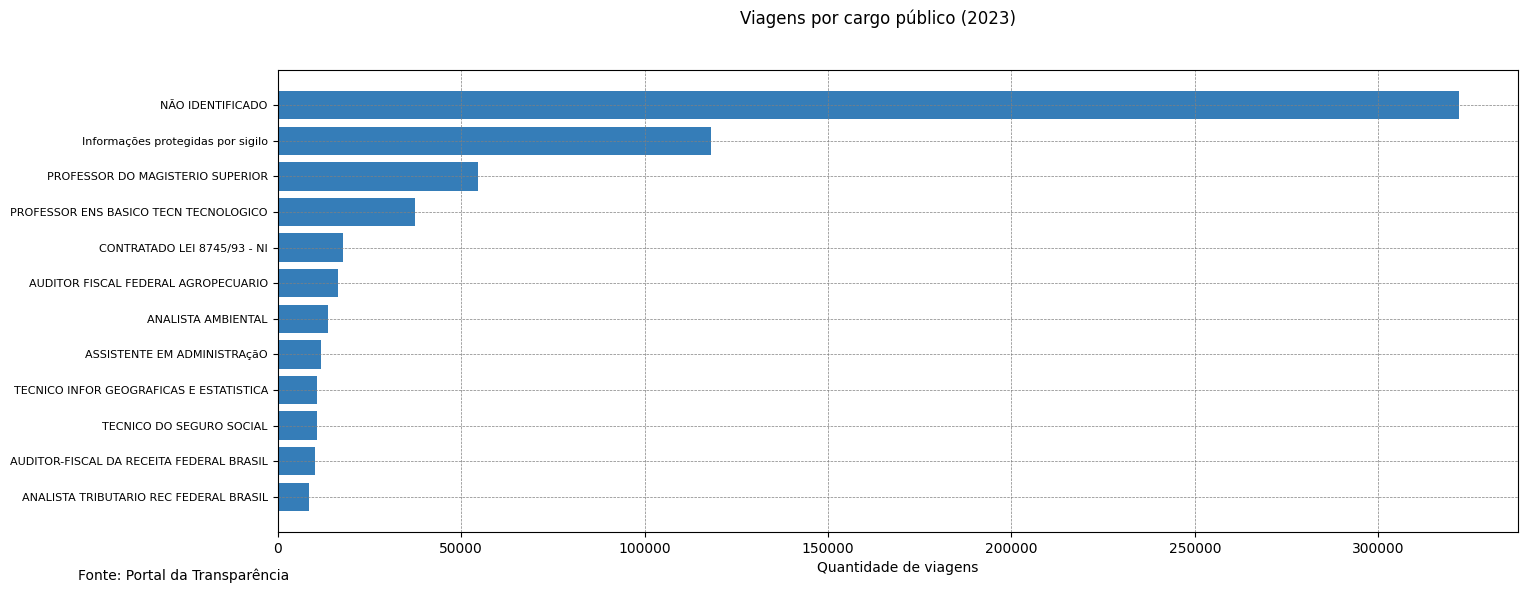

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(df_final["Cargo"], df_final["n_viagens"], color="#357db8")
ax.set_facecolor("#ffffff")
ax.invert_yaxis()
fig.suptitle("Viagens por cargo público (2023)")
plt.figtext(0.00, 0.03, "Fonte: Portal da Transparência")
plt.xlabel("Quantidade de viagens")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.yticks(fontsize=8)
plt.savefig(caminho_saida_grafico1, bbox_inches="tight")
plt.show()


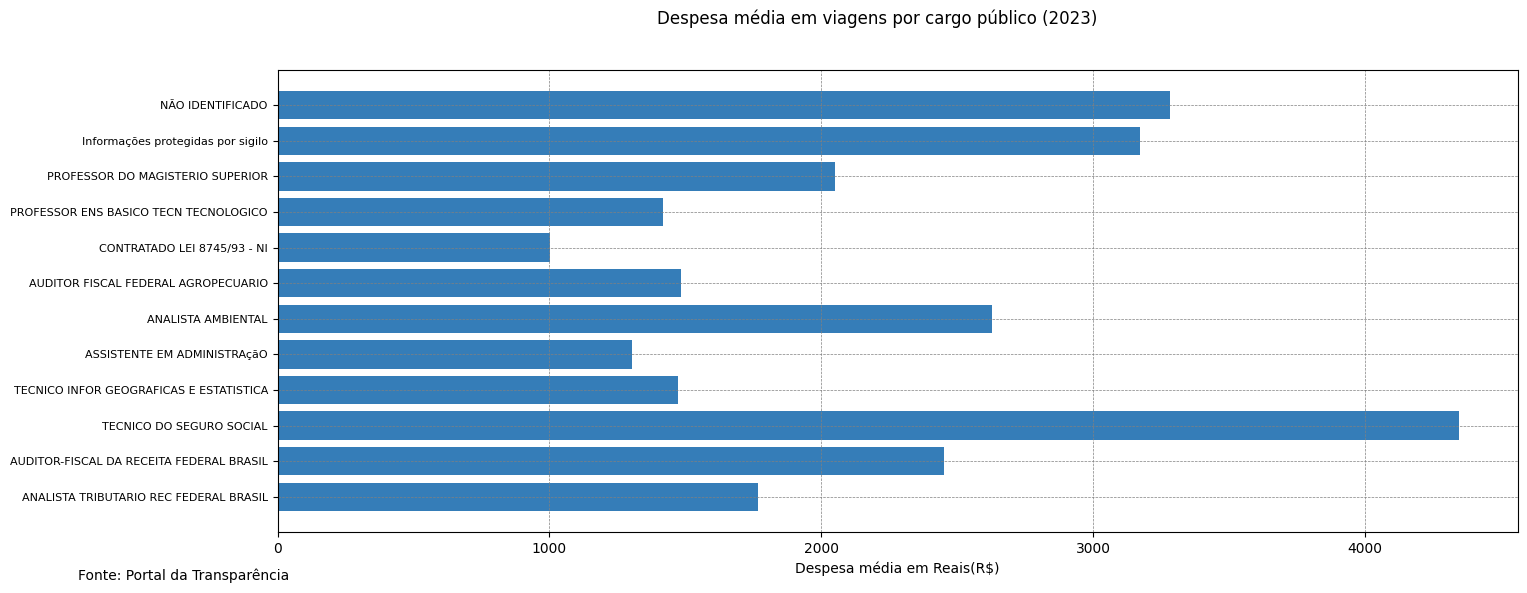

In [91]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(df_final["Cargo"], df_final["despesa_media"], color="#357db8")
ax.set_facecolor("#ffffff")
ax.invert_yaxis()
fig.suptitle("Despesa média em viagens por cargo público (2023)")
plt.figtext(0.00, 0.03, "Fonte: Portal da Transparência")
plt.xlabel("Despesa média em Reais(R$)")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.yticks(fontsize=8)
plt.savefig(caminho_saida_grafico2, bbox_inches="tight")
plt.show()

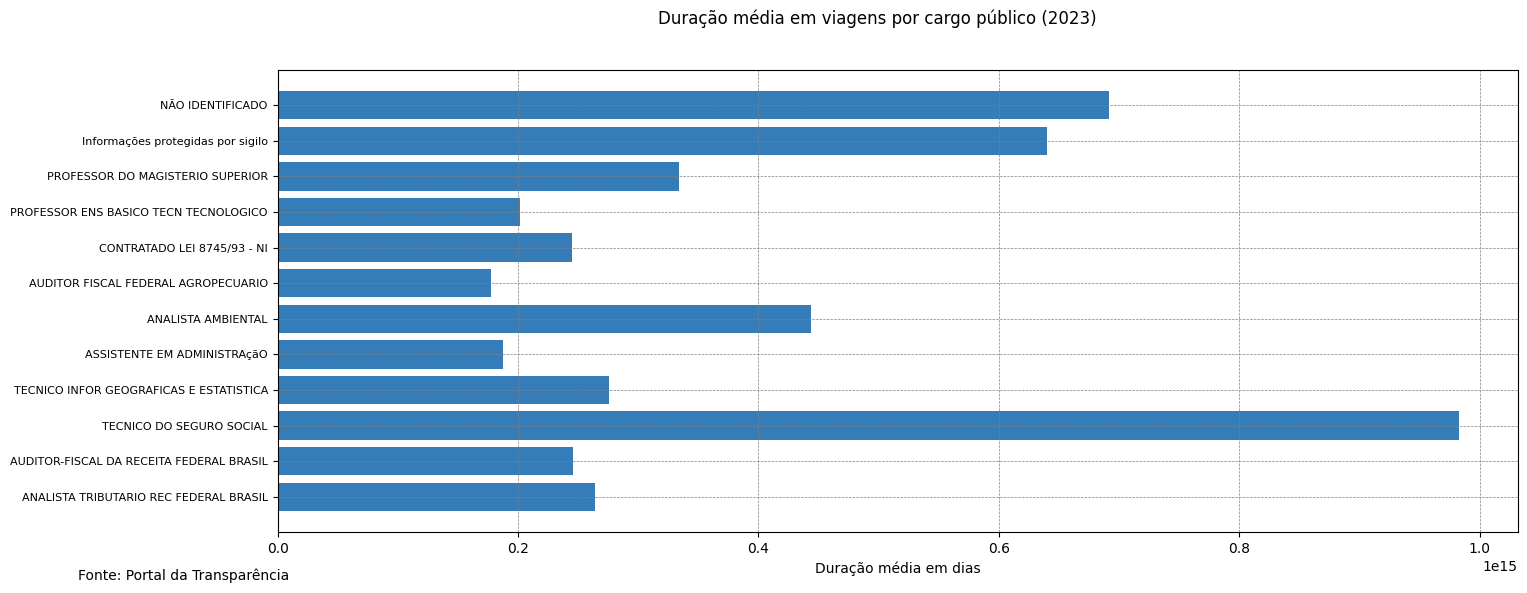

In [94]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(df_final["Cargo"], df_final["duracao_media"], color="#357db8")
ax.set_facecolor("#ffffff")
ax.invert_yaxis()
fig.suptitle("Duração média em viagens por cargo público (2023)")
plt.figtext(0.00, 0.03, "Fonte: Portal da Transparência")
plt.xlabel("Duração média em dias")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.yticks(fontsize=8)
plt.savefig(caminho_saida_grafico3, bbox_inches="tight")
plt.show()

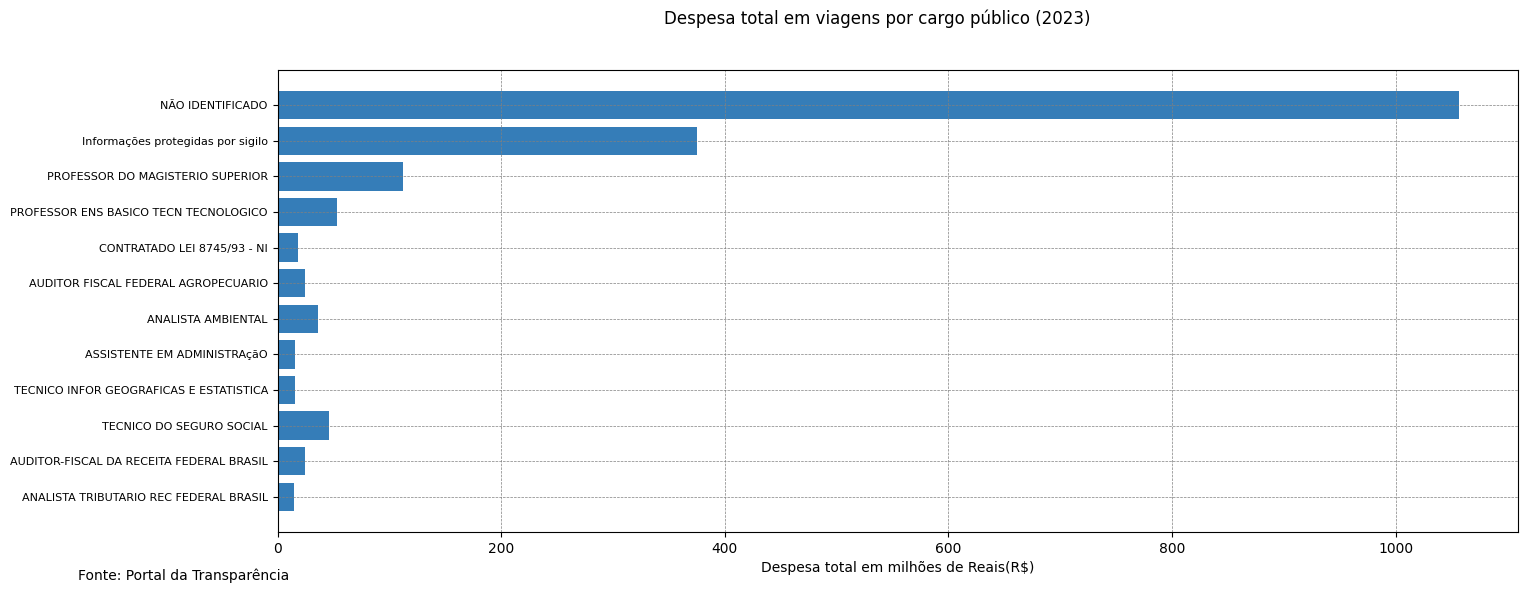

In [95]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(df_final["Cargo"], df_final["despesas_totais"]/1_000_000, color="#357db8")
ax.set_facecolor("#ffffff")
ax.invert_yaxis()
fig.suptitle("Despesa total em viagens por cargo público (2023)")
plt.figtext(0.00, 0.03, "Fonte: Portal da Transparência")
plt.xlabel("Despesa total em milhões de Reais(R$)")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.yticks(fontsize=8)
plt.savefig(caminho_saida_grafico4, bbox_inches="tight")
plt.show()